In [68]:
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score


## Loading Datasets 

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chidaksh/CosmosocClub/master/Parsec2023/user1_data.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/chidaksh/CosmosocClub/master/Parsec2023/user2_data.csv')

In [3]:
df1.head()

,ttime,pm1,pm2,pm3,am,sm,st,lum
0,2022-07-18 15:42:55,3.63,0.0,0.0,3.2,7813.0,25.65,15001.0
1,2022-07-18 15:47:55,4.19,0.0,0.0,4.8,7692.0,25.66,13863.0
2,2022-07-18 15:52:55,4.74,0.0,0.0,4.0,7813.0,25.67,13788.0
3,2022-07-18 15:57:55,5.30,0.0,0.0,4.8,7813.0,25.68,14383.0
4,2022-07-18 16:02:55,0.55,5.3,5.3,3.2,7813.0,25.69,14621.0


In [4]:
df2.head()

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
0,2022-07-18 15:39:58,0.83,0.00,0.00,0.0,7463.0,6547.0,23.02,90.57,92849.25
1,2022-07-18 15:44:55,1.39,0.00,0.00,0.0,7576.0,10249.0,23.47,88.37,92848.31
2,2022-07-18 15:49:55,1.95,0.00,0.00,0.0,7576.0,12636.0,23.64,85.26,92844.82
3,2022-07-18 15:54:55,2.51,0.00,0.00,0.0,7463.0,8318.0,23.62,85.93,92834.94
4,2022-07-18 15:59:56,0.55,2.51,2.51,0.0,7463.0,4149.0,23.82,86.06,92815.25


In [60]:
df1.shape 

(19341, 7)

In [61]:
df2.shape

(20166, 9)

In [62]:
df1.describe()

,pm1,pm2,pm3,am,sm,st,lum
count,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000,19341.000000
mean,1.610847,2.634487,60.406189,2.707189,4288.940593,26.852714,2726.855615
std,1.058214,1.292804,28.330731,1.824523,2901.962556,1.163759,4227.461974
min,0.550000,1.110000,5.300000,0.800000,286.000000,24.040000,1.000000
25%,0.550000,1.670000,38.550000,2.015076,541.000000,26.110000,1.000000
50%,1.110000,2.230000,51.400000,2.015076,6173.000000,26.700000,14.000000
75%,2.230000,3.350000,77.110000,3.200000,6667.000000,27.390000,4675.000000
max,6.700000,6.700000,153.660000,18.390000,7937.000000,31.170000,19288.000000


In [63]:
df2.describe()

,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
count,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000,20166.000000
mean,1.585495,2.581735,59.183922,1.302631,4353.081633,2969.565732,22.625972,78.329035,93154.619405
std,1.045641,1.288210,28.154372,1.573685,3067.826740,4250.061969,4.666760,24.007034,290.963485
min,0.550000,1.110000,2.510000,0.729346,325.000000,1.000000,8.610000,13.320000,92352.450000
25%,0.550000,1.670000,36.880000,0.729346,468.000000,3.000000,20.000000,61.690000,92976.272500
50%,1.110000,2.230000,51.400000,0.729346,6410.000000,384.000000,21.430000,88.220000,93152.930000
75%,2.230000,3.350000,77.110000,0.729346,7042.000000,5275.000000,26.110000,100.000000,93350.997500
max,6.700000,6.700000,153.660000,18.390000,7937.000000,19767.000000,36.880000,100.000000,94042.780000


## Data Preprocessing 

In [64]:
df1.isna().sum()

pm1    0
pm2    0
pm3    0
am     0
sm     0
st     0
lum    0
dtype: int64

In [65]:
df2.isna().sum()

pm1     0
pm2     0
pm3     0
am      0
sm      0
lum     0
temp    0
humd    0
pres    0
dtype: int64

In [66]:
for column_name in df1.columns:
    column = df1[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  0
Count of zeros in column  pm3  is :  0
Count of zeros in column  am  is :  0
Count of zeros in column  sm  is :  0
Count of zeros in column  st  is :  0
Count of zeros in column  lum  is :  0


In [67]:
for column_name in df2.columns:
    column = df2[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  0
Count of zeros in column  pm3  is :  0
Count of zeros in column  am  is :  0
Count of zeros in column  sm  is :  0
Count of zeros in column  lum  is :  0
Count of zeros in column  temp  is :  0
Count of zeros in column  humd  is :  0
Count of zeros in column  pres  is :  0


In [13]:
del(df1['ttime'])
del(df2['ttime'])

### Replacing invalid values using mean 

In [70]:
for column in df1.columns:
    col_mean = df1[column].mean()
    df1[column] = df1[column].replace(0, col_mean)

In [71]:
for column in df2.columns:
    col_mean = df2[column].mean()
    df2[column] = df2[column].replace(0, col_mean)

In [72]:
for column_name in df1.columns:
    column = df1[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  0
Count of zeros in column  pm3  is :  0
Count of zeros in column  am  is :  0
Count of zeros in column  sm  is :  0
Count of zeros in column  st  is :  0
Count of zeros in column  lum  is :  0


In [73]:
for column_name in df2.columns:
    column = df2[column_name]
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  pm1  is :  0
Count of zeros in column  pm2  is :  0
Count of zeros in column  pm3  is :  0
Count of zeros in column  am  is :  0
Count of zeros in column  sm  is :  0
Count of zeros in column  lum  is :  0
Count of zeros in column  temp  is :  0
Count of zeros in column  humd  is :  0
Count of zeros in column  pres  is :  0


### Heatmap for Dataset 1 

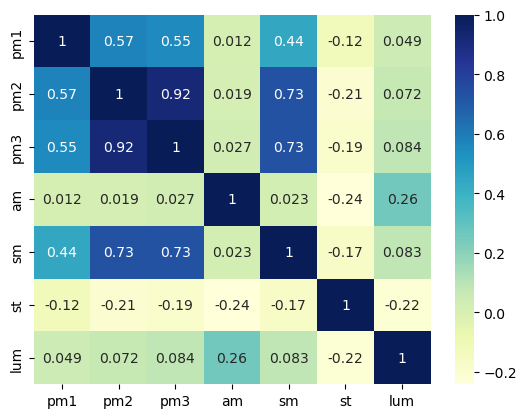

In [74]:
sns.heatmap(df1.corr(), cmap="YlGnBu", annot = True)
plt.show()

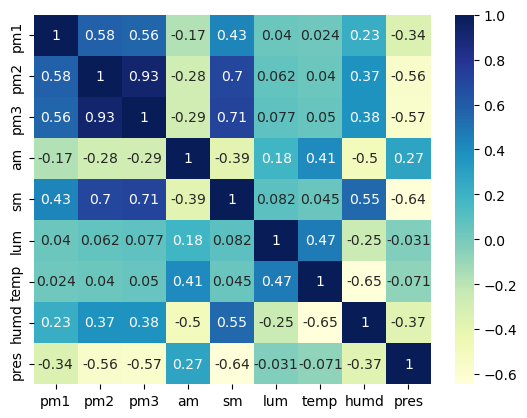

In [75]:
sns.heatmap(df2.corr(), cmap="YlGnBu", annot = True)
plt.show()

### Train Test Split

In [76]:
X_temp1=df1.drop('sm',axis=1)
Y_temp1=df1.sm
X_temp2=df2.drop('sm',axis=1)
Y_temp2=df2.sm

In [77]:
x1_train, x1_test,y1_train,y1_test = train_test_split(X_temp1,Y_temp1,test_size =0.2)

In [78]:
x2_train, x2_test,y2_train,y2_test = train_test_split(X_temp2,Y_temp2,test_size =0.2)

In [79]:
Multivariable_model1 = LinearRegression()
Multivariable_model2 = LinearRegression()

In [80]:
Multivariable_model1.fit(x1_train,y1_train)
Multivariable_model2.fit(x2_train,y2_train)

LinearRegression()

In [81]:
Multivariable_model1.score(x1_test,y1_test)

0.5522435909020286

### Accuracy of Multivariable linear regression for dataset 1 is 55.22%

In [82]:
Multivariable_model2.score(x2_test,y2_test)

0.7450214383335041

###  Accuracy of Multivariable linear regression for dataset 2 is 74.50%

In [83]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(x1_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y1_train)

LinearRegression()

In [84]:
X_poly_test = poly.transform(x1_test)
y_test_pred = lin_reg.predict(X_poly_test)
r2_test = r2_score(y1_test, y_test_pred)
print("R2 score on testing data:", r2_test)

R2 score on testing data: 0.870703101951592


###  Accuracy of Multivariable polynomial regression for dataset 1 is 87.07%

In [34]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(x2_train)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y2_train)

LinearRegression()

In [35]:
X_poly_test = poly.transform(x2_test)
y_test_pred = lin_reg.predict(X_poly_test)
r2_test = r2_score(y2_test, y_test_pred)
print("R2 score on testing data:", r2_test)

R2 score on testing data: 0.8743976766151814


###  Accuracy of Multivariable polynomial regression for dataset 2 is 87.43

In [85]:
degrees = [2, 3, 4, 5, 6]

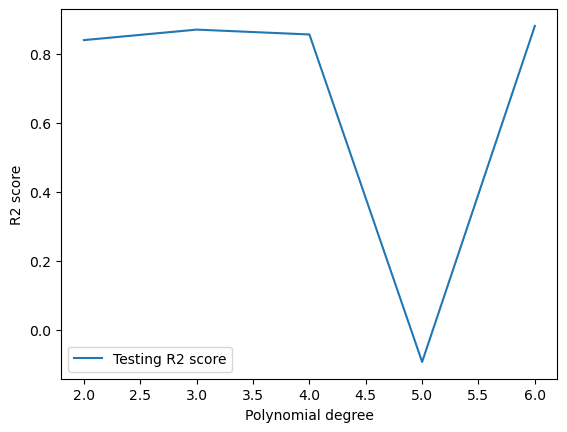

In [86]:
test_scores = []
train_scores = []
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(x2_train)
    X_poly_test = poly.transform(x2_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly_train, y2_train)
    y_train_pred = lin_reg.predict(X_poly_train)
    y_test_pred = lin_reg.predict(X_poly_test)
    train_scores.append(r2_score(y2_train, y_train_pred))
    test_scores.append(r2_score(y2_test, y_test_pred))

# Plot the results
plt.plot(degrees, test_scores, label='Testing R2 score')
plt.xlabel('Polynomial degree')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [87]:
pred1 = pd.read_csv('https://raw.githubusercontent.com/chidaksh/CosmosocClub/master/Parsec2023/user1_data.csv')
pred2 = pd.read_csv('https://raw.githubusercontent.com/chidaksh/CosmosocClub/master/Parsec2023/user2_data.csv')

In [88]:
pred2.tail()

,ttime,pm1,pm2,pm3,am,sm,lum,temp,humd,pres
20161,2023-03-10 08:59:16,0.55,1.11,27.38,3.2,327.0,6352.0,27.04,32.24,93560.72
20162,2023-03-10 09:27:12,1.11,1.11,27.38,3.2,327.0,7057.0,28.53,28.69,93574.12
20163,2023-03-10 09:55:12,1.67,1.11,27.38,4.8,327.0,7661.0,30.07,24.39,93571.75
20164,2023-03-10 10:23:12,0.55,1.67,27.93,4.0,327.0,8386.0,31.55,22.99,93558.36
20165,2023-03-10 10:51:14,1.11,1.67,27.93,2.4,328.0,8954.0,32.68,20.85,93541.99


In [89]:
pred_df1=pred2[19675:19730]
pred_df2=pred2[19730:19784]
pred_df3=pred2[19784:19837]
pred_df4=pred2[19837:19887]
pred_df5=pred2[19887:19939]
pred_df6=pred2[19939:19990]
pred_df7=pred2[19990:20042]
pred_df8=pred2[20042:20093]
pred_df9=pred2[20093:20145]
pred_df10=pred2[20145:20167]

In [90]:
from sklearn import linear_model
xx1= pred_df1[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy1 = pred_df1['sm']
xx2= pred_df2[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy2 = pred_df2['sm']
xx3= pred_df3[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy3 = pred_df3['sm']
xx4= pred_df4[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy4 = pred_df4['sm']
xx5= pred_df5[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy5 = pred_df5['sm']
xx6= pred_df6[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy6 = pred_df6['sm']
xx7= pred_df7[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy7 = pred_df7['sm']
xx8= pred_df8[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy8 = pred_df8['sm']
xx9= pred_df9[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy9 = pred_df9['sm']
xx10= pred_df10[['pm1', 'pm2','pm3','am','lum','temp','humd','pres']]
yy10 = pred_df10['sm']

C:\Users\Satwik K\AppData\Local\Temp\ipykernel_17884\2053298378.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_df[column] = pred_df[column].replace(0, col_mean)


In [91]:
X_poly_test1 = poly.transform(xx1)
y_test_pred1 = lin_reg.predict(X_poly_test1)

X_poly_test2 = poly.transform(xx2)
y_test_pred2 = lin_reg.predict(X_poly_test2)

X_poly_test3 = poly.transform(xx3)
y_test_pred3 = lin_reg.predict(X_poly_test3)

X_poly_test4 = poly.transform(xx4)
y_test_pred4 = lin_reg.predict(X_poly_test4)

X_poly_test5 = poly.transform(xx5)
y_test_pred5 = lin_reg.predict(X_poly_test5)

X_poly_test6 = poly.transform(xx6)
y_test_pred6 = lin_reg.predict(X_poly_test6)

X_poly_test7 = poly.transform(xx7)
y_test_pred7 = lin_reg.predict(X_poly_test7)

X_poly_test8 = poly.transform(xx8)
y_test_pred8 = lin_reg.predict(X_poly_test8)

X_poly_test9 = poly.transform(xx9)
y_test_pred9 = lin_reg.predict(X_poly_test9)

X_poly_test10 = poly.transform(xx10)
y_test_pred10= lin_reg.predict(X_poly_test10)

In [95]:
print(yy1.mean(),"  ", y_test_pred1.mean())
print(yy2.mean(),"  "  ,y_test_pred2.mean())
print(yy3.mean(),"  " ,y_test_pred3.mean())
print(yy4.mean(),"             "  ,y_test_pred4.mean())
print(yy5.mean(),"  "  ,y_test_pred5.mean())
print(yy6.mean(),"  " ,y_test_pred6.mean())
print(yy7.mean(),"  "  ,y_test_pred7.mean())
print(yy8.mean(),"  "  ,y_test_pred8.mean())
print(yy9.mean() ,"   " ,y_test_pred9.mean())
print(yy10.mean(),"   " ,y_test_pred10.mean())


330.1636363636364    255.22627547156404
330.037037037037    380.42760110329147
329.1132075471698    498.5845938372549
328.48               681.6100147633628
328.34615384615387    345.0359161955734
328.19607843137254    294.9167876979884
327.96153846153845    347.2068314497682
327.01960784313724    188.40384573507689
327.0769230769231     229.6662088597838
326.5238095238095     330.0853000037106
